In [1]:
# CIS 545

In [2]:
## CIS 545 Homework 1 - Spring 2019
# Updated January 2019

## Part 2: Data Wrangling and Analysis

Now, having set up our data from Part 1 earlier, we can pull data from those tables and conduct some data analysis. Part of the reason we had you store tables in advance was to create a sort of "checkpoint" in the middle of the assignment - after running Homework 1-1, you should be able to just start from your `HW1_DB` - although you can definitely go back and update your 1-1, and then pull from the database again!

To recap briefly from before: 

*Terminology*      
We’ll generally use `field`, `column`, and `attribute` interchangeably to mean a named column in a DataFrame.  We’ll also generally assume that `table`, `DataFrame`, and `relation` mean the same thing.

*Submission*      
See the external document for submission information.  Remember to also do **Homework 1, Part 2** and optionally **Homework 1-Advanced**.

*NBGrader Information*      
We're using a package called `nbgrader` to grade your assignments using an autograding system. With that, there's a couple things to take note:
- If we specify a format, please use it!
- Some cells will not be able to be edited - that is totally fine, we'll mark them
- You may add/remove cells, but if a cell is marked test cases, please don't change it...just add cells before/after it!

## Step 4: Data Wrangling

Start off by connecting to the database (as above), import pandas as pd, and then load back your DataFrames: airlines, airports, routes, incidents and flights from SQL, using the syntax:

`dataframe = pd.read_sql_query('select * from table_name', engine)`

In [3]:
# Just run this cell! Then proceed to the next one
import sqlite3
import pandas as pd

engine = sqlite3.connect('HW1_DB')

In [4]:
# TODO: Re-load dataframes from SQL

airlines_df = pd.read_sql('select * from airlines_df', engine)
airports_df = pd.read_sql('select * from airports_df', engine)
routes_df = pd.read_sql('select * from routes_df', engine)
incidents_df = pd.read_sql('select * from incidents_df', engine)

In [5]:
# [CIS 545 Test Cases] (1 pt)
# Just checking to make sure that your columns are correct at a very basic level

if ('index' in airlines_df.columns):
    raise ValueError("SQL added an index column -- shouldn't have that plus the Pandas index")
    
if ('index' in airports_df.columns):
    raise ValueError("SQL added an index column -- shouldn't have that plus the Pandas index")

if ('index' in routes_df.columns):
    raise ValueError("SQL added an index column -- shouldn't have that plus the Pandas index")

if ('index' in incidents_df.columns):
    raise ValueError("SQL added an index column -- shouldn't have that plus the Pandas index")
    
print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


## Step 4.1: Understanding and inspecting routes_df

Recall details of `routes_df`...note that we're using `.head(15)` for conciseness, but certainly feel free to view larger chunks of the data table as you go! 

In [6]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66548 entries, 0 to 66547
Data columns (total 9 columns):
airline             66548 non-null object
airline_id          66548 non-null int64
src_iata_icao       66548 non-null object
source_id           66548 non-null int64
target_iata_icao    66548 non-null object
target_id           66548 non-null int64
code_share          66548 non-null object
stops               66548 non-null int64
equipment           66548 non-null object
dtypes: int64(4), object(5)
memory usage: 4.6+ MB


In [7]:
routes_df.head(15)

,airline,airline_id,src_iata_icao,source_id,target_iata_icao,target_id,code_share,stops,equipment
0,2B,410,AER,2965,KZN,2990,,0,CR2
1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,2B,410,CEK,2968,OVB,4078,,0,CR2
5,2B,410,DME,4029,KZN,2990,,0,CR2
6,2B,410,DME,4029,NBC,6969,,0,CR2
7,2B,410,DME,4029,UUA,6160,,0,CR2
8,2B,410,EGO,6156,KGD,2952,,0,CR2
9,2B,410,EGO,6156,KZN,2990,,0,CR2


In [8]:
routes_df.describe()

,airline_id,source_id,target_id,stops
count,66548.000000,66548.000000,66548.000000,66548.000000
mean,3367.569754,2660.201929,2662.088192,0.000165
std,3182.024330,1577.965637,1578.661433,0.012856
min,10.000000,1.000000,1.000000,0.000000
25%,1317.000000,1382.000000,1382.000000,0.000000
50%,2942.000000,2958.000000,2958.000000,0.000000
75%,4608.000000,3670.000000,3670.000000,0.000000
max,19676.000000,9327.000000,9327.000000,1.000000


### 4.1.1 Computing Flight Routes

Now suppose you are interested in what flights are available out of PHL or JFK.  

Compute this using `routes_df`, showing just the airline (`airline_iata`), source (`src_iata_icao`) and target (`target_iata_icao`). 

To make it easier to understand, order the result primarily by `src_iata_icao` and secondarily by `target_iata_icao`.

Name your output `JFK_PHL_df` - this is important, since we'll be grading on this. If you do not follow these policies you may lose points and may not get all of them back - see the regrade policy!

In [20]:
# TODO: Select routes out of PHL or JFK, showing just the airline (airline_iata), source (src_iata_icao) 
# and target (target_iata_icao).  Order the result primarily by src_iata_icao and secondarily by target_iata_icao.

JFK_PHL_df = routes_df[['airline', 'src_iata_icao', 'target_iata_icao']]
PHL_df = JFK_PHL_df[JFK_PHL_df['src_iata_icao']== 'PHL']
JFK = JFK_PHL_df[JFK_PHL_df['src_iata_icao']== 'JFK']
JFK_PHL_df = pd.concat([PHL_df, JFK])
JFK_PHL_df = JFK_PHL_df.sort_values(by=['src_iata_icao', 'target_iata_icao'])

In [21]:
# View JFK_PHL_df
JFK_PHL_df.head(20)

,airline,src_iata_icao,target_iata_icao
13675,B6,JFK,ABQ
20490,DL,JFK,ACC
5231,AA,JFK,AMM
47125,RJ,JFK,AMM
58517,US,JFK,AMM
20491,DL,JFK,AMS
36079,KL,JFK,AMS
5232,AA,JFK,ANU
58518,US,JFK,ANU
22050,DY,JFK,ARN


In [22]:
# [CIS 545 Test Cases] (2 pts)
# Checking your table for correctness

if (len(JFK_PHL_df.columns) != 3):
    raise ValueError("Incorrect number of columns")
    

print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [23]:
# [CIS 545 Test Cases] (2 pts)
# Checking your table for correctness


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [24]:
# [CIS 545 Test Cases] (3 pts)
# Checking values in the table


print('[CIS 545 Test Cases] (3 pts)')

[CIS 545 Test Cases] (3 pts)


### 4.1.2 Busy Airports

Now let's understand more about the really busy airports in `routes_df`.  To do this, create a dataframe `busy_df` which shows the number of flights out of each source airport, restricted to those with more than 500 such flights.

Your result should be indexed by `src_iata_icao` with an aggregate field labeled `count` - order the result so that the busiest airport is first.

In [25]:
# TODO: reate a dataframe busy_df which shows the number of flights out of each source airport, 
# restricted to those with more than 500 such flights. Your result should be indexed by src_iata_icao 
# with an aggregate field labeled “count”.
diction = {}.fromkeys(routes_df['src_iata_icao'].unique(), 0)
busy_df = pd.DataFrame(columns=['src_iata_icao', 'count'])
#busy_df['src_iata_icao'] = routes_df['src_iata_icao'].unique()
for i in routes_df['src_iata_icao']:
    diction[i] +=1
i=0
for key, value in diction.items():
    entity = {'src_iata_icao':key,'count':value }
    busy_df = busy_df.append(entity, ignore_index = True)
busy_df = busy_df[busy_df['count']>500]
busy_df = busy_df.sort_values(by=['count'], ascending=False)
print(busy_df)

    src_iata_icao count
826           ATL   909
121           ORD   558
255           PEK   527
413           LHR   527
387           CDG   524


In [26]:
# View busy_df
busy_df.head(20)

,src_iata_icao,count
826,ATL,909
121,ORD,558
255,PEK,527
413,LHR,527
387,CDG,524


In [27]:
# [CIS 545 Test Cases] (2 pts)
# Checking table setup


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [28]:
# [CIS 545 Test Cases] (2 pts)
# Checking table values 


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [29]:
# [CIS 545 Test Cases] (2 pts)
# Checking table values, more closely 


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


### 4.1.3 Data Visualization

Visualize this result using a pie-chart with x as the value of `src_iata_icao` and y as the count. To do this, you will need to import `matplotlib`, and specify "pie" as the type of the plot.

In [30]:
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.patches.Wedge at 0x7fc4c592b1d0>,
 [Text(0.650688,0.886907,'ATL'),
  Text(-0.848215,0.700379,'ORD'),
  Text(-1.00023,-0.457754,'PEK'),
  Text(-0.0595527,-1.09839,'LHR'),
  Text(0.943128,-0.566136,'CDG')])

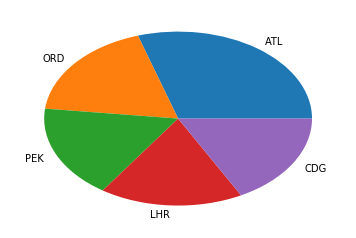

In [31]:
# TODO: Create a pie-chart of busy_df 
# Set x as the value of src_iata_icao and y as the count.

plt.pie(busy_df['count'] , labels = busy_df['src_iata_icao'])

## 4.2 Understanding airline information

Now let's understand the *airline* information within the datasets. 

### 4.2.1 Airlines and Flights
Start by recalling the details of `airlines_df` and `flights_df`, after extracting `flights_df` from the tables.

In [32]:
# TODO: Load flights df from flights as you did earlier

flights_df = pd.read_sql('select * from flights_df', engine)

In [33]:
# [CIS 545 Test Cases] (2 pts)
# Checking that you pulled flights_df correctly

if (len(flights_df) != 570118):
    raise ValueError("Make sure you imported the correct table!")


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [34]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
airline_id         6048 non-null int64
airline_name       6048 non-null object
alias              6048 non-null object
airline_iata       6048 non-null object
airline_icao       6048 non-null object
callsign           6048 non-null object
airline_country    6048 non-null object
active             6048 non-null object
dtypes: int64(1), object(7)
memory usage: 378.1+ KB


In [35]:
airlines_df.head(15)

,airline_id,airline_name,alias,airline_iata,airline_icao,callsign,airline_country,active
0,1,Private flight,,-,,,,Y
1,2,135 Airways,,,GNL,GENERAL,United States,N
2,3,1Time Airline,,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,,,WYT,,United Kingdom,N
4,5,213 Flight Unit,,,TFU,,Russia,N
5,6,223 Flight Unit State Airline,,,CHD,CHKALOVSK-AVIA,Russia,N
6,7,224th Flight Unit,,,TTF,CARGO UNIT,Russia,N
7,8,247 Jet Ltd,,,TWF,CLOUD RUNNER,United Kingdom,N
8,9,3D Aviation,,,SEC,SECUREX,United States,N
9,10,40-Mile Air,,Q5,MLA,MILE-AIR,United States,Y


In [36]:
airlines_df.describe()

,airline_id
count,6048.000000
mean,3844.729167
std,3945.495487
min,-1.000000
25%,1512.750000
50%,3025.500000
75%,4543.250000
max,19845.000000


In [37]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 9 columns):
YEAR             570118 non-null int64
MONTH            570118 non-null int64
DAY_OF_MONTH     570118 non-null int64
CARRIER          570118 non-null object
FL_NUM           570118 non-null int64
ORIGIN           570118 non-null object
DEST             570118 non-null object
ARR_DELAY_NEW    551498 non-null float64
CANCELLED        570118 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 39.1+ MB


In [38]:
flights_df.head(15)

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,ARR_DELAY_NEW,CANCELLED
0,2018,1,2,WN,1325,SJU,MCO,0.0,0.0
1,2018,1,2,WN,5159,SJU,MCO,0.0,0.0
2,2018,1,2,WN,5890,SJU,MCO,9.0,0.0
3,2018,1,2,WN,6618,SJU,MCO,0.0,0.0
4,2018,1,2,WN,1701,SJU,MDW,8.0,0.0
5,2018,1,2,WN,844,SJU,TPA,23.0,0.0
6,2018,1,2,WN,4679,SJU,TPA,0.0,0.0
7,2018,1,2,WN,6294,SLC,BUR,20.0,0.0
8,2018,1,2,WN,5245,SLC,DAL,0.0,0.0
9,2018,1,2,WN,2278,SLC,DEN,0.0,0.0


In [39]:
flights_df.describe()

,YEAR,MONTH,DAY_OF_MONTH,FL_NUM,ARR_DELAY_NEW,CANCELLED
count,570118.0,570118.0,570118.000000,570118.000000,551498.000000,570118.000000
mean,2018.0,1.0,15.934526,2573.227781,12.697799,0.030115
std,0.0,0.0,8.983067,1886.212325,44.624218,0.170903
min,2018.0,1.0,1.000000,1.000000,0.000000,0.000000
25%,2018.0,1.0,8.000000,924.000000,0.000000,0.000000
50%,2018.0,1.0,16.000000,2027.000000,0.000000,0.000000
75%,2018.0,1.0,24.000000,4041.000000,6.000000,0.000000
max,2018.0,1.0,31.000000,7439.000000,2023.000000,1.000000


### 4.2.2 Airline Computations

Now calculate the following information about airlines in the datasets. Be careful with capitalization and spelling!

- active_airlines: the number of active airlines in `airlines_df` 

- flights_airlines:  the number of different airlines in `flights_df`

- missing_flights:  the number of *active* airlines in `airlines_df` that are not in `flights_df`

Output these in a dictionary called **results** with three keys: `active_airlines`, `flights_airlines`, `missing_flights`.  

*Hint:  Be careul to use the right identifier for airlines.*

In [54]:
# TODO: output dictionary results {‘active_Airlines’: ___, ‘routes_Airlines’: ___, ‘missing_Routes’: ___}
import re
airlines_df = airlines_df.dropna(subset = ['airline_iata'])
active_airlines = airlines_df['airline_iata'].unique()
active_airlines = [x.upper() for x in active_airlines if re.match("[a-zA-Z0-9]+", x)]
flights_airlines = flights_df['CARRIER'].unique()
flights_airlines = [x.upper() for x in flights_airlines]
missing_flights =[x.upper() for x in active_airlines if x not in flights_airlines]
results = {'active_airlines’': active_airlines, 'flight_airlines': flights_airlines, 'missing_flights': missing_flights}

In [55]:
# View results
results

{'active_airlines’': ['1T',
  'Q5',
  'AN',
  '1B',
  'W9',
  'ZI',
  'AQ',
  'AA',
  'OZ',
  '4K',
  '8U',
  'Q9',
  'G4',
  'K5',
  'M3',
  '04',
  'GB',
  '8V',
  'E4',
  'YT',
  '4G',
  '7A',
  '8T',
  'ZY',
  'Z7',
  'JP',
  'UX',
  'EM',
  'A3',
  'KI',
  'PE',
  'KO',
  '5W',
  'VV',
  'I9',
  'WK',
  'QQ',
  'FG',
  'SU',
  'JA',
  'AF',
  'SB',
  'GN',
  '2O',
  '2Q',
  'V7',
  'SW',
  'G8',
  '5D',
  '1A',
  '7T',
  'PL',
  '8A',
  'GD',
  'LD',
  'HT',
  'J2',
  'U3',
  'AP',
  '5A',
  'ED',
  'AB',
  'AG',
  'AI',
  'ZB',
  'CC',
  'RB',
  'TN',
  'W4',
  'IZ',
  'JM',
  'S2',
  'KM',
  'M6',
  'NQ',
  '4A',
  'EH',
  'HP',
  'ZW',
  'U9',
  'VD',
  'TT',
  'QM',
  'BM',
  'NX',
  'ZV',
  'HM',
  'AM',
  'NH',
  'YW',
  'PX',
  'G9',
  'AC',
  'BT',
  'EL',
  'TL',
  '4N',
  'IW',
  'NZ',
  'J6',
  '2D',
  '6V',
  'XM',
  'OE',
  'GV',
  'JW',
  'W3',
  '2B',
  '4C',
  'AR',
  'QN',
  'AS',
  '4D',
  'EV',
  'OB',
  'TC',
  '2J',
  'HC',
  'FO',
  'PJ',
  '8C',
  'OS',
  'I

In [56]:
# [CIS 545 Test Cases] (2 pts)
# Checking the structure and values of results

if (type(results) != dict):
    raise TypeError("You didn't create a dictionary")


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [57]:
# [CIS 545 Test Cases] (1 pt)
# Checking the structure and values of results


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [58]:
# [CIS 545 Test Cases] (1 pt)
# Checking the structure and values of results


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [59]:
# [CIS 545 Test Cases] (1 pt)
# Checking the structure and values of results


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


### 4.2.3 "Risky" Airlines

Using `incidents_df`, we want to understand the “risky” airlines.  To do this, calculate the frequency of occurrence of each airline in `incidents_df`, and choose the top-10.  Your result should be a DataFrame called `risky_df` indexed by rank (0 being the most risky), and columns `Airline` and `count`

You may find the `.reset_index()` method useful.

Again, we will start by recalling details about `incidents_df`.

In [60]:
incidents_df = pd.read_sql('select * from incidents_df', engine)

In [61]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 3 columns):
Date         322 non-null object
Airline      322 non-null object
FlightNum    322 non-null object
dtypes: object(3)
memory usage: 7.6+ KB


In [62]:
incidents_df.head(10)

,Date,Airline,FlightNum
0,1997-01-09 00:00:00,Comair,3272
1,1997-03-18 00:00:00,Stavropolskaya Aktsionernaya Avia,1023
2,1997-04-19 00:00:00,Merpati Nusantara Airlines,106
3,1997-05-08 00:00:00,China Southern Airlines,3456
4,1997-07-31 00:00:00,FedEx Express,14
5,1997-07-17 00:00:00,Sempati Air,304
6,1997-08-06 00:00:00,Korean Air,801
7,1997-08-10 00:00:00,Formosa Airlines,7601
8,1997-09-03 00:00:00,Vietnam Airlines,815
9,1997-09-06 00:00:00,Royal Brunei Airlines,238


In [63]:
incidents_df.describe()

,Date,Airline,FlightNum
count,322,322,322
unique,309,240,302
top,2001-09-11 00:00:00,Turkish Airlines,120
freq,4,6,3


In [72]:
# TODO: calculate top-10 "risky" airlines
# Put result in a DataFrame called risky_df 
# Index your df by rank (0 being the most frequent), and having columns 'Airline' and 'count'.
diction = {}.fromkeys(incidents_df['Airline'].unique(), 0)
risky_df = pd.DataFrame(columns=['Airline', 'count'])
for i in incidents_df['Airline']:
    diction[i] +=1

for key, value in diction.items():
    entity = {'Airline':key,'count':value}
    risky_df = risky_df.append(entity, ignore_index = True)
risky_df = risky_df.sort_values(by = ['count'], ascending=False)[0:10]
risky_df = risky_df.reset_index(drop=True)
    

In [73]:
# View your dataframe
risky_df

,Airline,count
0,American Airlines,6
1,Turkish Airlines,6
2,EgyptAir,5
3,Merpati Nusantara Airlines,5
4,Southwest Airlines,5
5,Air France,5
6,Qantas,4
7,British Airways,4
8,China Airlines,4
9,FedEx Express,4


In [74]:
# [CIS 545 Test Cases] (1 pt)
# Checking that you created risky_df's base structure


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [75]:
# [CIS 545 Test Cases] (2 pts)
# Checking that you created risky_df correctly


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [76]:
# [CIS 545 Test Cases] (2 pts)
# Checking that you created risky_df correctly


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


### 4.2.4 Delayed and Cancelled

Now calculate *all* airlines with delayed or cancelled flights, i.e. the airlines of flights in `flights_df` whose arrival was delayed by 30 min or more or which were cancelled.  We will call this `delayed_cancelled_df`, and will use this in the next part of the homework.

The result should be a dataframe with two columns, `CARRIER` and `count` with the index indicating rank (i.e. entry 0 should be the highest count).

In [85]:
# TODO: calculate delayed_cancelled_df
delayed_cancelled_df=pd.DataFrame(columns=['CARRIER','count'])
cancelled = flights_df[flights_df['CANCELLED']!=0.0]
delayed = flights_df[flights_df['ARR_DELAY_NEW']!=float('nan')]
delayed = delayed[delayed['ARR_DELAY_NEW']>=30.0]
delayed_cancelled = pd.concat([delayed, cancelled])
diction = {}.fromkeys(delayed_cancelled['CARRIER'].unique(), 0)
for i in delayed_cancelled['CARRIER']:
    diction[i] +=1
for key, value in diction.items():
    entity = {'CARRIER':key,'count':value}
    delayed_cancelled_df = delayed_cancelled_df.append(entity, ignore_index = True)
delayed_cancelled_df = delayed_cancelled_df.sort_values(by = ['count'], ascending=False)
delayed_cancelled_df = delayed_cancelled_df.reset_index(drop=True)
    

In [86]:
# View your dataframe
delayed_cancelled_df

,CARRIER,count
0,WN,11762
1,OO,11093
2,AA,8186
3,DL,7910
4,B6,6447
5,UA,4778
6,OH,4657
7,YX,4303
8,EV,3896
9,MQ,3870


In [87]:
# [CIS 545 Test Cases] (1 pt)
# Checking that you created delayed_cancelled's base structure


print('[CIS 545 Test Cases] (1 pts)')

[CIS 545 Test Cases] (1 pts)


In [88]:
# [CIS 545 Test Cases] (1 pt)
# Checking that you created delayed_cancelled correctly


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [89]:
# [CIS 545 Test Cases] (2 pts)
# Checking that you created risky_df correctly
# Value checks, part 1


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [90]:
# [CIS 545 Test Cases] (2 pts)
# Checking that you created risky_df correctly
# Value checks, part 2


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


## Step 5: Combining DataFrames 

In this part, we want to combine information about airlines from both sources, `risky_df` (pulled from `incidents_df`) and `delayed_cancelled_df` (pulled from `flights_df`) to calculate the “very bad” airlines.  These are airlines that are both “risky” and which are “bad flights.”   This is an example of **data integration**, i.e. of linking data across heterogeneous sources.

Unfortunately, `incidents_df` uses the *names* of airlines whereas `flights_df` uses *IATA codes*.  However, the dataset `airlines_df` contains a correspondence between airline names and IATA codes which can be used to "translate" the airport IATA codes in `flights_df` to airline names. 

Although it may be clear to you which columns match between the two DataFrames, in general the number of columns (schemas) may be very large in datasets so it is not always obvious.  It is therefore helpfult to develop **schema matching** techniques to help discover these correspondences. 

We will use a very simple technique here to find what columns relate between `airlines_df` and `flights_df`, and then use this to combine `risky_df` and `delayed_cancelled_df`.

## 5.1 Relating Airlines and Flights: Schema Matching

Let's start by detecting what fields (columns) “match” between the `airlines_df` and `flights_df` DataFrames.  

To do this, let’s note that we only care about the “categorical” (string-valued) columns.  What we want is, e.g., to find fields that have lots of common values (for instance, airline abbreviations or airport codes).  To measure this in a principled way, we’ll use a measure called the Jaccard distance (or Jaccard index or Jaccard measure).  The Jaccard distance measures similarity between two sets A and B, and is merely:

\begin{equation*}
| A \cap B | / |A \cup B|
\end{equation*}

Let’s compute the Jaccard distances between (the values of) all pairs of attributes in `airlines_df` and `flights_df`. This will tell us which attributes include similar values - and thus which might represent the same concept. 

### 5.1.1 Column / Schema Matches

Create a Cell with an algorithm that iterates over all `airlines_df` keys (columns) and all `flights_df` keys. Create a nested map of: 

$${r → {p → distance}}$$

Your algorithm should store the Jaccard distance between the values in routes column $r$ to the values in performance column $p$ (for distances that are non-zero and only for non-numeric columns).  

Remember, since there may be duplicates, you’ll need to convert columns into sets of unique values through `drop_duplicates()`.  

Your keys for the outer dictionary, from flights, should be: `CARRIER`, `ORIGIN`, and `DEST`

In [91]:
# Find what columns relate in airlines_df and flights_df 
# TODO: create nested map of Jaccard distance
# Your keys for the outer dictionary, from flights, should be:
# CARRIER, ORIGIN, and DEST

best_match = {}

for col_1 in airlines_df.columns:
    if airlines_df[col_1].dtype == np.dtype('O'):
        col1_df = airlines_df.drop_duplicates(col_1)
        best_match[col_1]={}
        for col_2 in flights_df.columns:
            if flights_df[col_2].dtype ==  np.dtype('O'):
                col2_df = flights_df.drop_duplicates(col_2)
                list1=[x for x in col1_df[col_1] if str(x) != 'nan']
                list2=[x for x in col2_df[col_2] if str(x) != 'nan']
                set1=  set(list1)
                set2= set(list2)
                intersect = len(set1.intersection(set2))
                union = len(set1.union(set2))
                score = intersect/union
                if score != 0:
                    best_match[col_1][col_2]= score

In [92]:
flights_df.dtypes

YEAR               int64
MONTH              int64
DAY_OF_MONTH       int64
CARRIER           object
FL_NUM             int64
ORIGIN            object
DEST              object
ARR_DELAY_NEW    float64
CANCELLED        float64
dtype: object

In [95]:
airlines_df.dtypes

airline_id          int64
airline_name       object
alias              object
airline_iata       object
airline_icao       object
callsign           object
airline_country    object
active             object
dtype: object

In [96]:
# View your dictionary
best_match

{'airline_name': {},
 'alias': {},
 'airline_iata': {'CARRIER': 0.01651376146788991},
 'airline_icao': {'ORIGIN': 0.035829512650704706,
  'DEST': 0.035829512650704706},
 'callsign': {'ORIGIN': 0.0005409304002884963, 'DEST': 0.0005409304002884963},
 'airline_country': {},
 'active': {}}

In [97]:
# [CIS 545 Test Cases] (2 pts)
# Checking the structure of best_match

if (type(best_match) != dict):
    raise TypeError("You didn't create a dictionary")
    

print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [98]:
# [CIS 545 Test Cases] (2 pts)
# Checking the Jaccard mappings


print('[CIS 545 Test Cases] (2 pts)')

[CIS 545 Test Cases] (2 pts)


In [99]:
# [CIS 545 Test Cases] (3 pts)
# Checking the Jaccard values

    
print('[CIS 545 Test Cases] (3 pts)')

[CIS 545 Test Cases] (3 pts)


In [100]:
airlines_df

,airline_id,airline_name,alias,airline_iata,airline_icao,callsign,airline_country,active
0,1,Private flight,,-,,,,Y
1,2,135 Airways,,,GNL,GENERAL,United States,N
2,3,1Time Airline,,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,,,WYT,,United Kingdom,N
4,5,213 Flight Unit,,,TFU,,Russia,N
5,6,223 Flight Unit State Airline,,,CHD,CHKALOVSK-AVIA,Russia,N
6,7,224th Flight Unit,,,TTF,CARGO UNIT,Russia,N
7,8,247 Jet Ltd,,,TWF,CLOUD RUNNER,United Kingdom,N
8,9,3D Aviation,,,SEC,SECUREX,United States,N
9,10,40-Mile Air,,Q5,MLA,MILE-AIR,United States,Y


### 5.1.2 Matching columns

The above map should help you decide which column in `airlines_df` is the best match for `CARRIER` in `flights_df`.

Note that the ORIGIN and DEST codes also have a match which doesn't make much sense; they are 3-letter **airport** codes rather than a 3-letter **airline** codes.  So you need to use your own knowledge of the semantics of the fields to disambiguate which pairs are correct.  In this case, we will just use the match for `CARRIER`.

In [101]:
# TODO: pdate the dictionary to include the name of the attribute in airports_df that corresponds to CARRIER.

# Update here!
my_choice = 'airline_iata'

mapping = {'CARRIER': my_choice} 


In [102]:
# [CIS 545 Test Cases] (1 pt)
# Checking the Jaccard values


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


## 5.2  Joining DataFrames

Now that you know how `airports_df` and `flights_df` relate, use this to add the names of airports to `delayed_cancelled_df`.  Note that each data source (and thus DataFrame) is in fact incomplete.  For this step we’ll want to only consider the airport information and flight information that “intersect.”

Create a DataFrame `delayed_cancelled_ext_df` by merging `delayed_cancelled_df` and `airports_df` on the fields that correspond to airport IATA codes in each DataFrame.  Use `delayed_cancelled.merge` as well as `left_on` and `right_on`.

The result should have columns `airline_name`, `airline_id` and `count`.


In [107]:
# TODO: create joint DataFrame delayed_cancelled_ext_df.  
# The result should have columns airline_name, airline_id and count.

print(delayed_cancelled_df)
delayed_cancelled_ext_df = airlines_df.merge(delayed_cancelled_df, how ='inner' ,\
                               left_on = ['airline_iata'], \
                               right_on = ['CARRIER'])
delayed_cancelled_ext_df = delayed_cancelled_ext_df[['airline_name', 'airline_iata', 'count']]
delayed_cancelled_ext_df = delayed_cancelled_ext_df.rename(columns={'airline_iata':'airline_id'})

   CARRIER  count
0       WN  11762
1       OO  11093
2       AA   8186
3       DL   7910
4       B6   6447
5       UA   4778
6       OH   4657
7       YX   4303
8       EV   3896
9       MQ   3870
10      9E   3325
11      YV   2739
12      F9   1663
13      NK   1613
14      G4    915
15      AS    894
16      VX    646
17      HA    352


In [108]:
# View delayed_cancelled_ext_df
delayed_cancelled_ext_df

,airline_name,airline_id,count
0,American Airlines,AA,8186
1,Allegiant Air,G4,915
2,Alaska Airlines,AS,894
3,Atlantic Southeast Airlines,EV,3896
4,American Eagle Airlines,MQ,3870
5,Comair,OH,4657
6,Delta Air Lines,DL,7910
7,Frontier Airlines,F9,1663
8,Hawaiian Airlines,HA,352
9,JetBlue Airways,B6,6447


In [109]:
# [CIS 545 Test Cases] (1 pt)
# Checking delayed_cancelled_ext_df

if (delayed_cancelled_ext_df.shape[1] != 3):
    raise ValueError("Unexpected number of columns")
    
if (delayed_cancelled_ext_df.shape[0] <= 5):
    raise ValueError("Probably missing rows...")

print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [110]:
# [CIS 545 Test Cases] (1 pt)
# Checking delayed_cancelled_ext_df


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [111]:
# [CIS 545 Test Cases] (4 pts)
# Checking delayed_cancelled_ext_df

if (max(delayed_cancelled_ext_df['count']) < 1000):
    raise ValueError("Maximum count seems too low")


print('[CIS 545 Test Cases] (4 pts)')

[CIS 545 Test Cases] (4 pts)


## 5.3 Calculate "very bad" airlines

We are finally in a position to calculate the “very bad” airlines, i.e. those that are in both `risky_df` and `delayed_cancelled_ext_df`. Do this by merging the two DataFrames to create a result, `very_bad_df` - you'll note that this has two `count` columns, which won't work:

- Rename the `risky_df` column to `accident_count`
- For `delayed_cancelled_ext_df`, use `dc_count`

Your dataframe should have `airline_name` as well as the two counts.

In [116]:
# TODO: Merge the two DataFrames to create a result that has airline_name, as well as accident_count and dc_count.

risky_df = risky_df.rename(columns={'count':'accident_count'})
print(risky_df)
delayed_cancelled_ext_df = delayed_cancelled_ext_df.rename(columns={'count':'dc_count'})
print(delayed_cancelled_ext_df)
very_bad_df = risky_df.merge(delayed_cancelled_ext_df, how='inner',\
                            left_on = 'Airline', \
                            right_on = 'airline_name')
very_bad_df = very_bad_df[['airline_name', 'accident_count', 'dc_count']]

                      Airline accident_count
0           American Airlines              6
1            Turkish Airlines              6
2                    EgyptAir              5
3  Merpati Nusantara Airlines              5
4          Southwest Airlines              5
5                  Air France              5
6                      Qantas              4
7             British Airways              4
8              China Airlines              4
9               FedEx Express              4
                   airline_name airline_id dc_count
0             American Airlines         AA     8186
1                 Allegiant Air         G4      915
2               Alaska Airlines         AS      894
3   Atlantic Southeast Airlines         EV     3896
4       American Eagle Airlines         MQ     3870
5                        Comair         OH     4657
6               Delta Air Lines         DL     7910
7             Frontier Airlines         F9     1663
8             Hawaiian Airlines      

In [117]:
# View very_bad_df
very_bad_df

,airline_name,accident_count,dc_count
0,American Airlines,6,8186
1,Southwest Airlines,5,11762


In [118]:
# [CIS 545 Test Cases] (1 pt)
# Checking very_bad_df


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [119]:
# [CIS 545 Test Cases] (1 pt)
# Checking very_bad_df - ballpark


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [120]:
# [CIS 545 Test Cases] (1 pt)
# Checking very_bad_df - exact


print('[CIS 545 Test Cases] (1 pt)')

[CIS 545 Test Cases] (1 pt)


In [121]:
# [CIS 545 Test Cases] (3 pts)
# Checking very_bad_df - exact
 

print('[CIS 545 Test Cases] (3 pts)')

[CIS 545 Test Cases] (3 pts)


## Submission

As per the Homework 1 write-up, please submit your assignment on OpenSubmit as a zip file, `hw1.zip`, containing **only** `Homework 1-1.ipynb` and `Homework 1-2.ipynb` - you should NOT include the dataset descriptions or any of the datasets in your submission!

Please make sure to run your notebooks fully and make sure they work prior to submission. This will help you catch typos and other errors that could cost test case points.

The assignment is due Feburary 11, 2019 at 10PM. Although we include a 1 hour grace period for submissions, that is meant to avoid having to take late days due to any errors in submission or validation or errors caught at the last minute. Going past this means you'll be taking late days, which will be 3 days after this period unless stated otherwise!